# Курсовая работа #

## Часть 1. Метод неопределенных коэффициэнтов

Возьмем данные из exel таблицы с помощью библиотеки pandas.

In [58]:
import pandas as pd
data = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Ярыгин')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(x)
print(y)

[0, 8, 10, 20, 21, 30, 43, 50, 65, 75, 87, 100, 125, 130, 150, 172, 200, 250, 254, 300, 341, 400, 500, 514, 600, 700, 747, 800, 900, 1000, 1100, 1200, 1212]
[12.5, 12.66, 12.66, 12.64, 12.64, 12.64, 12.64, 12.64, 12.63, 12.64, 12.66, 12.52, 11.94, 11.77, 10.84, 9.73, 8.9, 7.75, 8.16, 7.03, 6.76, 6.07, 5.21, 5.12, 4.71, 4.38, 4.28, 4.14, 3.89, 3.63, 3.37, 3.11, 3.08]


Будем искать апроксимирующую функцию в виде y = ax + b

In [59]:
import numpy as np
def MNK(x, y):
    c1 = np.sum(np.multiply(x, x))
    c2 = np.sum(x)
    c3 = np.sum(np.multiply(x, y))
    d1 = c2
    d2 = len(x)
    d3 = np.sum(y)
    A = np.array([[c1, c2], [d1, d2]])
    B = np.array([[c3],[d3]])
    E = np.linalg.solve(A, B)
    a = E[0,0]
    b = E[1,0]
    return(a, b)
a, b = MNK(x, y)
for X in x:
    print(a*X+b)

12.026731088187299
11.95300859915215
11.934577976893362
11.842424865599426
11.833209554470033
11.750271754305489
11.63047270962337
11.565965531717616
11.42773586477671
11.335582753482774
11.224999019930051
11.105199975247933
10.87481719701309
10.828740641366123
10.64443441877825
10.441697573931588
10.183668862308567
9.722903305838884
9.686042061321308
9.262137749369199
8.88430999306406
8.340606636429833
7.419075523490466
7.290061167678956
6.4975444105511
5.576013297611734
5.142893674530232
4.654482184672368
3.7329510717330017
2.8114199587936337
1.8898888458542675
0.9683577329149013
0.8577739993621769


Строим график полученной функции и отмечаем иходные точки

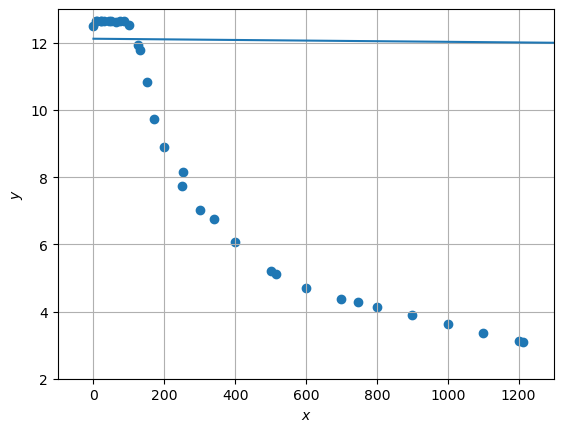

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-100, 1300])
ax.set_ylim([2, 13])
c = np.arange(-10, 10.01, 0.01)
plt.scatter(x, y)
plt.plot(a*c+b)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Часть 2. Интерполяционный многочлен Лагранжа

Также импортируем данные из exel таблицы с помощью библиотеки pandas

In [56]:
import pandas as pd
df = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Lagrange')
df = df.dropna()
x = df.iloc[:,0].tolist()
y = df.iloc[:,1].tolist()

Напишем функцию, строящую интеполяционный многочлен Лагранжа.

In [57]:
def create_basic_polynomial(x, i):
    def basic_polynomial(X):
        divider = 1
        result = 1
        for j in range(len(x)):
            if j != i:
                result *= (X-x[j])
                divider *= (x[i]-x[j])
            if divider == 0:
                divider = 1
        return result/divider
    return basic_polynomial

def create_Lagrange_polynomial(x, y):
    basic_polynomials = []
    for i in range(len(x)):
        basic_polynomials.append(create_basic_polynomial(x, i))

    def lagrange_polynomial(X):
        result = 0
        for i in range(len(y)):
            result += y[i]*basic_polynomials[i](X)
        return result
    return lagrange_polynomial
lag_pol = create_Lagrange_polynomial(x, y)
for X in x:
    print(lag_pol(X))
print(y)

0.0
8.0
10.0
19.0
20.0
0.0
50.0
58.0
75.0
78.0
101.0
118.0
126.0
151.0
153.0
201.0
252.0
287.0
302.0
376.0
403.0
504.0
603.0
605.0
706.0
807.0
904.0
[0, 8, 10, 19, 20, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 252, 287, 302, 376, 403, 504, 603, 605, 706, 807, 904]


С помощью библиотеки matplotlib.pyplot изобразим полученный полином Лагранжа на графике.

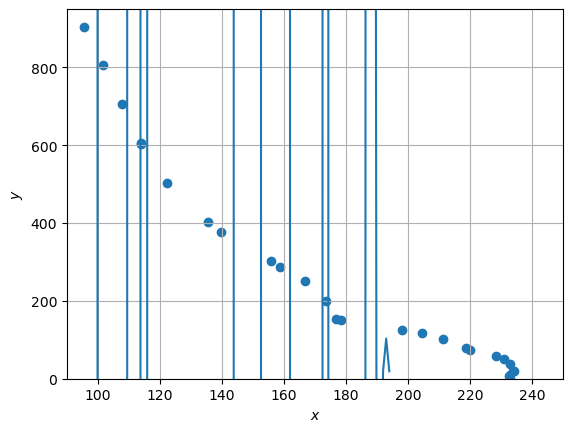

In [43]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([90, 250])
ax.set_ylim([0, 950])
plt.scatter(x, y) 
c = np.linspace(95.4, 234.1, 195)
plt.plot(lag_pol(c))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Вывод

У phyton существует большое количество библиотек, которые позволяют решать различные задачи. В этой работе мы использовали библиотеке matplotlib.pyplot, pandas и numpy, чтобы аппроксимировать линейной функцией или полиномом заданое множество точек на графике. 